In [1]:

#  --> sequential --> long duration


In [2]:

# import libraries
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
# execute if warnings should be ignored
import warnings
warnings.filterwarnings('ignore')


In [3]:

# Input data files from windows:
# "C:\Users\dietm\Desktop\Image_Recognition\data_vehicle_recognition" directory
import os


In [4]:

# preparing the filenames:
list_files = []

for dirname,_,filenames in os.walk('./data_vehicle_recognition/'):
    for filename in filenames:
        list_files.append(os.path.join(dirname,filename))
        
print(len(list_files))


525


In [5]:

# preparing the path:
#C:\Users\dietm\Documents\Data Science_Didi\Projekt\Projekt Recognition\data_vehicle_recognition\vehicles
root_dir = './data_vehicle_recognition/vehicles/'


In [6]:

# for reading images:
import cv2


In [7]:

# preparing datas and labels in lists:
data = []
labels = []
label_names = []

for label in os.listdir(root_dir):
    path = "./data_vehicle_recognition/vehicles/{0}/".format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        img = cv2.imread(path + image_path)
        img = cv2.resize(img, (32, 32))
        data.append(img)
        labels.append(label)
        if not label in label_names:
            label_names.append(label)


In [8]:

# labels unique:
label_names


['bike',
 'boat',
 'bus',
 'car',
 'cycle',
 'helicopter',
 'plane',
 'scooty',
 'truck']

In [9]:

# preparing right shape for datas/labels:
data = np.array(data)


In [10]:
data.shape

(525, 32, 32, 3)

In [11]:
labels = np.array(labels)

In [12]:
labels.shape

(525,)

In [13]:

# import for preparing labels:
from sklearn.preprocessing import LabelEncoder


In [14]:

# initialize and preparing:
le = LabelEncoder()
labels = le.fit_transform(labels)


In [15]:

# import for converting to categorical:
from tensorflow.keras.utils import to_categorical


In [16]:

labels = to_categorical(labels)


In [17]:

# right shape:
labels.shape,data.shape


((525, 9), (525, 32, 32, 3))

In [18]:

# before train/test/split --> a shuffle for both data sets with indices:
new = np.arange(525)


In [19]:
new

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [20]:

np.random.shuffle(new)


In [21]:
new

array([123, 164, 215, 157,  82, 264,  87, 300, 120,  89, 447, 296, 422,
       252, 426, 334, 257, 266, 313, 213, 331, 330, 427,  78, 173,   1,
        42,   2, 258, 226,  25, 367, 166, 372, 443, 107, 130, 200,  22,
       286, 376,  63, 497, 134,  83, 124,  15, 104, 302, 156, 446, 184,
       292, 463, 458, 225, 490, 328, 322, 423, 404,  37,  95,  70, 321,
       207, 431, 118, 135, 388, 251, 194, 518, 488,  30, 110, 217, 233,
       277, 365, 281, 163, 348, 417, 373, 444, 409, 344,  24,  58, 479,
        51, 212,  11, 172, 188,  23, 127, 515, 377, 346, 275, 381, 393,
        60, 221, 476, 379, 441, 353,  45, 185, 250, 139, 456, 293, 193,
       283, 356, 418, 232, 289, 399,   8, 108, 132, 191, 357, 391, 280,
       438, 278, 242, 482, 400, 237, 190, 263, 111, 248, 170, 333, 385,
       270, 265, 450, 219, 276, 287, 187, 502,  44, 406, 428, 380, 146,
       216, 253, 268,  94, 254, 432, 345, 143, 489, 136, 211, 451, 352,
       435, 154, 471, 117, 513, 256, 208, 290, 359, 475, 106, 43

In [22]:

# --> shuffle with indices:
data = data[new]
labels = labels[new]


In [23]:

# import for --> train/test/split
from sklearn.model_selection import train_test_split


In [24]:

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=33)


In [25]:

# import librarys from tensorflow for layers and models:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,LeakyReLU
from tensorflow.keras.models import Sequential


In [26]:

# create model:
model = Sequential([
    Conv2D(32,(3,3),padding="same",activation="relu",input_shape=(32,32,3)),
    Conv2D(32,(3,3),activation="relu"),
    
    Conv2D(64,(3,3),padding="same",activation=LeakyReLU(0.001)),
    Conv2D(64,(3,3),activation=LeakyReLU(0.001)),
    MaxPool2D(),
    
    Dropout(0.25),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(9,activation="softmax")
])


In [27]:

# compile:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [28]:

# train:
history = model.fit(X_train,y_train,batch_size=32,epochs=8,validation_split=0.25)


Epoch 1/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.1266 - loss: 57.6988 - val_accuracy: 0.1333 - val_loss: 2.6192
Epoch 2/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.1297 - loss: 2.6400 - val_accuracy: 0.1238 - val_loss: 2.1691
Epoch 3/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.1327 - loss: 2.1504 - val_accuracy: 0.2381 - val_loss: 2.1530
Epoch 4/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.1543 - loss: 2.1167 - val_accuracy: 0.1429 - val_loss: 2.1540
Epoch 5/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.2242 - loss: 2.0339 - val_accuracy: 0.2190 - val_loss: 2.0965
Epoch 6/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.2416 - loss: 1.9633 - val_accuracy: 0.1905 - val_loss: 2.0756
Epoch 7/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.2547 - loss: 1.8828 - val_accuracy: 0.3143 - val_loss: 1.9523
Epoch 8/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.3393 - loss: 1.7670 - val_accuracy: 0.2857 - 

In [29]:

# values of accuracy and loss:
history_df = pd.DataFrame(history.history)


In [30]:

history_df.tail(5)


,accuracy,loss,val_accuracy,val_loss
3,0.165079,2.110657,0.142857,2.153957
4,0.219048,2.025803,0.219048,2.096495
5,0.231746,1.988327,0.190476,2.075573
6,0.279365,1.862987,0.314286,1.952262
7,0.317460,1.755574,0.285714,1.899643


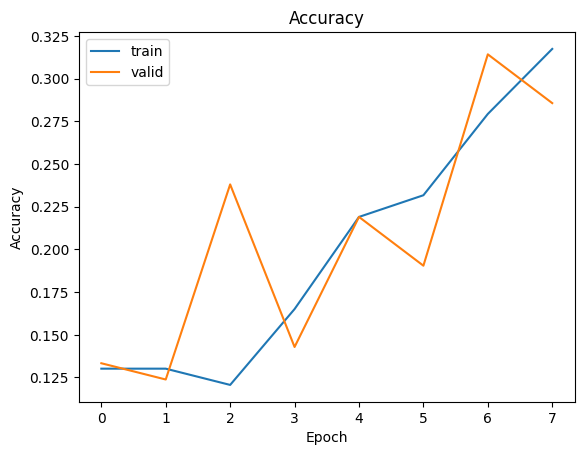

In [31]:
# visualization of accuracy and val_accuracy:
history_df[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

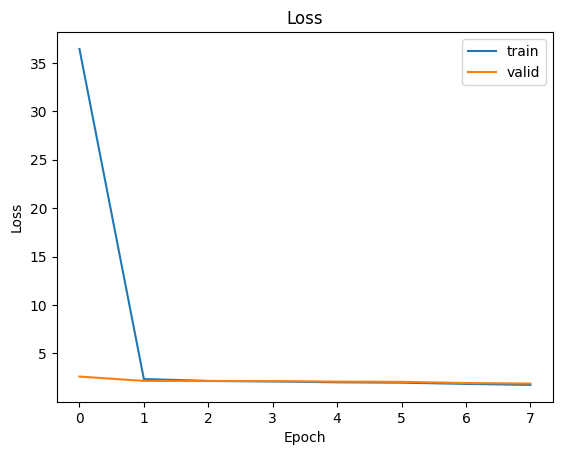

In [32]:

# visualization of accuracy and val_accuracy:
history_df[['loss','val_loss']].plot()
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()


In [33]:

# evaluate:
model.evaluate(X_test,y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3722 - loss: 1.9289


[1.9143372774124146, 0.3523809611797333]

In [34]:

y_pred = model.predict(X_test) 
label_classes = y_pred.argmax(axis=-1)
label_classes


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([3, 7, 3, 3, 4, 5, 4, 4, 0, 4, 3, 5, 3, 6, 0, 4, 1, 5, 3, 3, 1, 0,
       3, 7, 4, 4, 5, 3, 3, 5, 5, 3, 3, 3, 5, 7, 3, 5, 6, 3, 4, 4, 5, 3,
       4, 0, 4, 1, 4, 4, 4, 4, 3, 5, 4, 4, 5, 4, 3, 5, 8, 4, 5, 3, 4, 3,
       4, 5, 5, 1, 3, 4, 4, 1, 3, 5, 1, 1, 4, 1, 3, 1, 4, 1, 1, 1, 4, 0,
       6, 4, 4, 3, 3, 5, 3, 1, 4, 0, 1, 4, 4, 3, 5, 1, 3], dtype=int64)

In [35]:
type(label_classes)

numpy.ndarray

In [36]:

# convert y_test to an array like label_classes
liste_indices = []
for i in y_test:
    a = 0
    for j in i:
        if j == 1:
            liste_indices.append(a)
        a += 1


In [37]:
liste_indices_arr = np.asarray(liste_indices)

In [38]:
liste_indices_arr

array([2, 7, 3, 0, 3, 8, 0, 4, 0, 4, 3, 5, 8, 6, 0, 6, 3, 3, 3, 8, 5, 8,
       0, 7, 8, 6, 1, 0, 5, 5, 5, 3, 7, 8, 1, 6, 2, 7, 8, 7, 4, 4, 6, 0,
       4, 0, 2, 1, 0, 2, 1, 4, 2, 1, 4, 4, 6, 2, 3, 5, 2, 5, 8, 6, 4, 4,
       7, 3, 5, 2, 2, 7, 0, 2, 8, 8, 5, 7, 0, 5, 2, 1, 4, 1, 2, 6, 4, 8,
       1, 4, 4, 3, 6, 1, 6, 8, 3, 0, 1, 4, 4, 2, 4, 2, 2])

In [39]:
y_test

array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1.

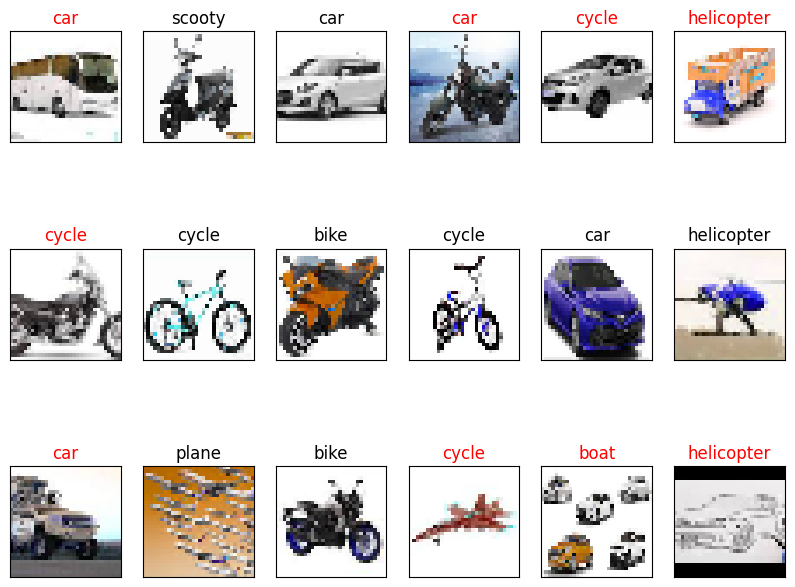

In [40]:

fig, ax = plt.subplots(3, 6, subplot_kw=dict(xticks=[], yticks=[]), figsize=(10,8))
for i, axi in enumerate(ax.flat):
    color = 'black'
    if label_classes[i]!=liste_indices_arr[i]:
        color='r'
    axi.imshow(X_test[i], cmap='Blues_r')
    axi.set_title(label_names[label_classes[i]], color=color)
plt.show()
